# All protocol consolidation

## Importing other Python Libraries/Modules

In [1]:
import re
import os
import sys
import string
from collections import defaultdict
import glob
import warnings
from datetime import datetime
from datetime import timedelta
import ast
import itertools

In [2]:
import matplotlib.pyplot as plt
from matplotlib import ticker
import numpy as np
import pandas as pd
import xlrd
import seaborn as sns
import matplotlib as mpl
mpl.rc('font',family='Arial')

In [3]:
# setting path
sys.path.append('../../src')

In [4]:
from elorating import calculation

In [5]:
# Increase size of plot in jupyter

plt.rcParams["figure.figsize"] = (18,10)

## Urine Marking Assay

In [6]:
urine_marking_file_paths = glob.glob("../2023_04_27_pilot_*_elo_rating_calculation/proc/elo_rating_spread_sheets/urine_marking/*_elo-rating-history.csv", recursive=True)

In [7]:
urine_marking_file_paths

['../2023_04_27_pilot_2_elo_rating_calculation/proc/elo_rating_spread_sheets/urine_marking/pilot_2_cages-1-2-3-4-5-6_uma_2022-07-11_2022-08-08_elo-rating-history.csv',
 '../2023_04_27_pilot_1_elo_rating_calculation/proc/elo_rating_spread_sheets/urine_marking/pilot_1_cages-1-2-3-4_uma_2022-05-18_2022-06-01_elo-rating-history.csv',
 '../2023_04_27_pilot_3_elo_rating_calculation/proc/elo_rating_spread_sheets/urine_marking/pilot_3_cages-1-2-3-4-5-6_uma_2022-09-12_2022-09-16_elo-rating-history.csv']

In [8]:
all_urine_marking_df = []
for file_path in urine_marking_file_paths:
    all_urine_marking_df.append(pd.read_csv(file_path, index_col=0))

In [9]:
combined_urine_marking_df = pd.concat(all_urine_marking_df)
combined_urine_marking_df = combined_urine_marking_df.reset_index(drop=True)

In [10]:
combined_urine_marking_df = combined_urine_marking_df.reset_index()

In [11]:
combined_urine_marking_df

,index,total_match_number,subject_id,agent_id,original_elo_rating,updated_elo_rating,win_draw_loss,subject_ranking,agent_ranking,pairing_index,...,sheet_name,session_number_difference,processed_cage_num_of_winner,processed_cage_num_of_loser,cage_num_of_subject,cage_num_of_agent,subject_strain,agent_strain,experiment_type,cohort
0,0,1,1.2,1.1,1000.0,1010.0,1.0,1,2,0,...,CAGE1,NaN,1,1,1,1,C57,C57,urine_marking,pilot_2
1,1,1,1.1,1.2,1000.0,990.0,0.0,2,1,1,...,CAGE1,NaN,1,1,1,1,C57,C57,urine_marking,pilot_2
2,2,2,1.3,1.4,1000.0,1000.0,0.5,2,3,0,...,CAGE1,0.0,1,1,1,1,C57,C57,urine_marking,pilot_2
3,3,2,1.4,1.3,1000.0,1000.0,0.5,3,2,1,...,CAGE1,0.0,1,1,1,1,C57,C57,urine_marking,pilot_2
4,4,3,1.1,1.3,990.0,990.3,0.5,4,3,0,...,CAGE1,1.0,1,1,1,1,C57,C57,urine_marking,pilot_2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,287,4,6.2,6.4,1000.0,989.7,0.0,4,2,1,...,CAGE6,0.0,6,6,6,6,CD1,CD1,urine_marking,pilot_3
288,288,5,6.4,6.1,1000.3,1010.0,1.0,2,4,0,...,CAGE6,1.0,6,6,6,6,CD1,CD1,urine_marking,pilot_3
289,289,5,6.1,6.4,990.3,980.6,0.0,4,2,1,...,CAGE6,1.0,6,6,6,6,CD1,CD1,urine_marking,pilot_3
290,290,6,6.3,6.2,1019.7,1028.8,1.0,1,4,0,...,CAGE6,0.0,6,6,6,6,CD1,CD1,urine_marking,pilot_3


In [12]:
combined_urine_marking_df.columns

Index(['index', 'total_match_number', 'subject_id', 'agent_id',
       'original_elo_rating', 'updated_elo_rating', 'win_draw_loss',
       'subject_ranking', 'agent_ranking', 'pairing_index', 'date', 'match',
       'left_number_of_spots', 'right_number_of_spots', 'winner', 'loser',
       'spot_number_difference', 'percent_difference', 'match_is_tie', 'notes',
       'sheet_name', 'session_number_difference',
       'processed_cage_num_of_winner', 'processed_cage_num_of_loser',
       'cage_num_of_subject', 'cage_num_of_agent', 'subject_strain',
       'agent_strain', 'experiment_type', 'cohort'],
      dtype='object')

In [13]:
combined_urine_marking_df["winner_number_of_spots"] = combined_urine_marking_df.apply(lambda x: x["left_number_of_spots"] if x["left_number_of_spots"] >= x["right_number_of_spots"] else x["right_number_of_spots"], axis = 1)
combined_urine_marking_df["loser_number_of_spots"] = combined_urine_marking_df.apply(lambda x: x["left_number_of_spots"] if x["left_number_of_spots"] <= x["right_number_of_spots"] else x["right_number_of_spots"], axis = 1)

In [14]:
combined_urine_marking_df["pee_spot_difference"] = combined_urine_marking_df["winner_number_of_spots"] - combined_urine_marking_df["loser_number_of_spots"]

In [15]:
combined_urine_marking_df["adjusted_pee_spot_difference"] = combined_urine_marking_df["pee_spot_difference"].apply(lambda x: 102 if x >= 100 else x)
combined_urine_marking_df["adjusted_winner_number_of_spots"] = combined_urine_marking_df["winner_number_of_spots"].apply(lambda x: 102 if x >= 100 else x)
combined_urine_marking_df["adjusted_loser_number_of_spots"] = combined_urine_marking_df["loser_number_of_spots"].apply(lambda x: 102 if x >= 100 else x)

# Plotting distribution of Urine Marking

In [17]:
os.makedirs("./proc/urine_marking_plots", exist_ok=True)

In [18]:
combined_urine_marking_df.to_csv("./proc/urine_marking_plots/uma_all_cohorts_elo_and_spots.csv")

In [19]:
c57_df = combined_urine_marking_df[combined_urine_marking_df["subject_strain"] == "C57"]

In [20]:
cd1_df = combined_urine_marking_df[combined_urine_marking_df["subject_strain"] == "CD1"]

In [21]:
y_max = 70

In [22]:
bin_width = 10

In [23]:
uma_bins = [i for i in range(0, 120, bin_width)]

In [24]:
bin_width = 5

In [25]:
uma_bins = [i for i in range(0, 110, bin_width)]

In [26]:
uma_bins

[0,
 5,
 10,
 15,
 20,
 25,
 30,
 35,
 40,
 45,
 50,
 55,
 60,
 65,
 70,
 75,
 80,
 85,
 90,
 95,
 100,
 105]

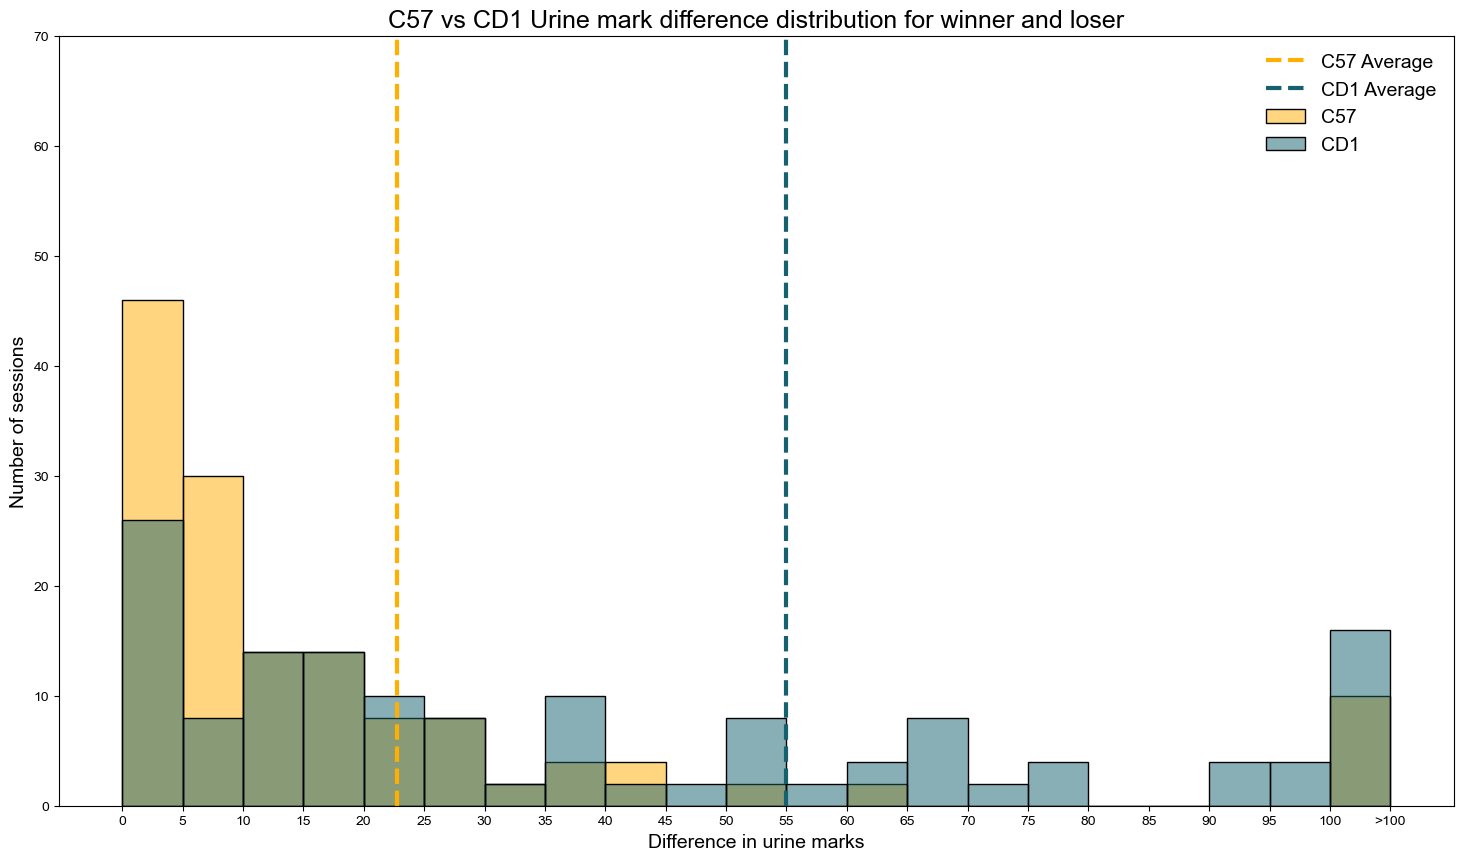

In [28]:
fig, ax = plt.subplots()

# Plotting the distribution
sns.histplot(c57_df["adjusted_pee_spot_difference"].abs(), bins=uma_bins, alpha=0.5, label='C57', color="#ffaf00")
sns.histplot(cd1_df["adjusted_pee_spot_difference"].abs(), bins=uma_bins, alpha=0.5, label='CD1', color="#15616f")

# Plotting the average
plt.axvline(c57_df["pee_spot_difference"].abs().mean(), color='#ffaf00', linestyle='--', linewidth=3, label="C57 Average")
plt.axvline(cd1_df["pee_spot_difference"].abs().mean(), color='#15616f', linestyle='--', linewidth=3, label="CD1 Average")

# Set the new x-ticks and labels
# plt.xticks(bin_centers, bin_labels, rotation='horizontal')
plt.xticks(uma_bins, uma_bins[:-1] + [">100"], rotation='horizontal')

# Setting the y-axis maximum
plt.ylim((0,y_max))

# Plot information
plt.title("C57 vs CD1 Urine mark difference distribution for winner and loser", family="Arial", fontsize=18)
plt.xlabel("Difference in urine marks", family="Arial", fontsize=14)
plt.ylabel("Number of sessions", family="Arial", fontsize=14)
plt.legend(loc='upper right', prop={'size': 14, 'family': "Arial"}, frameon=False)

# plt.tight_layout()

# Saving figure and displaying
plt.savefig("./proc/urine_marking_plots/winner_and_loser_difference_uma_distribution.svg")
plt.show()

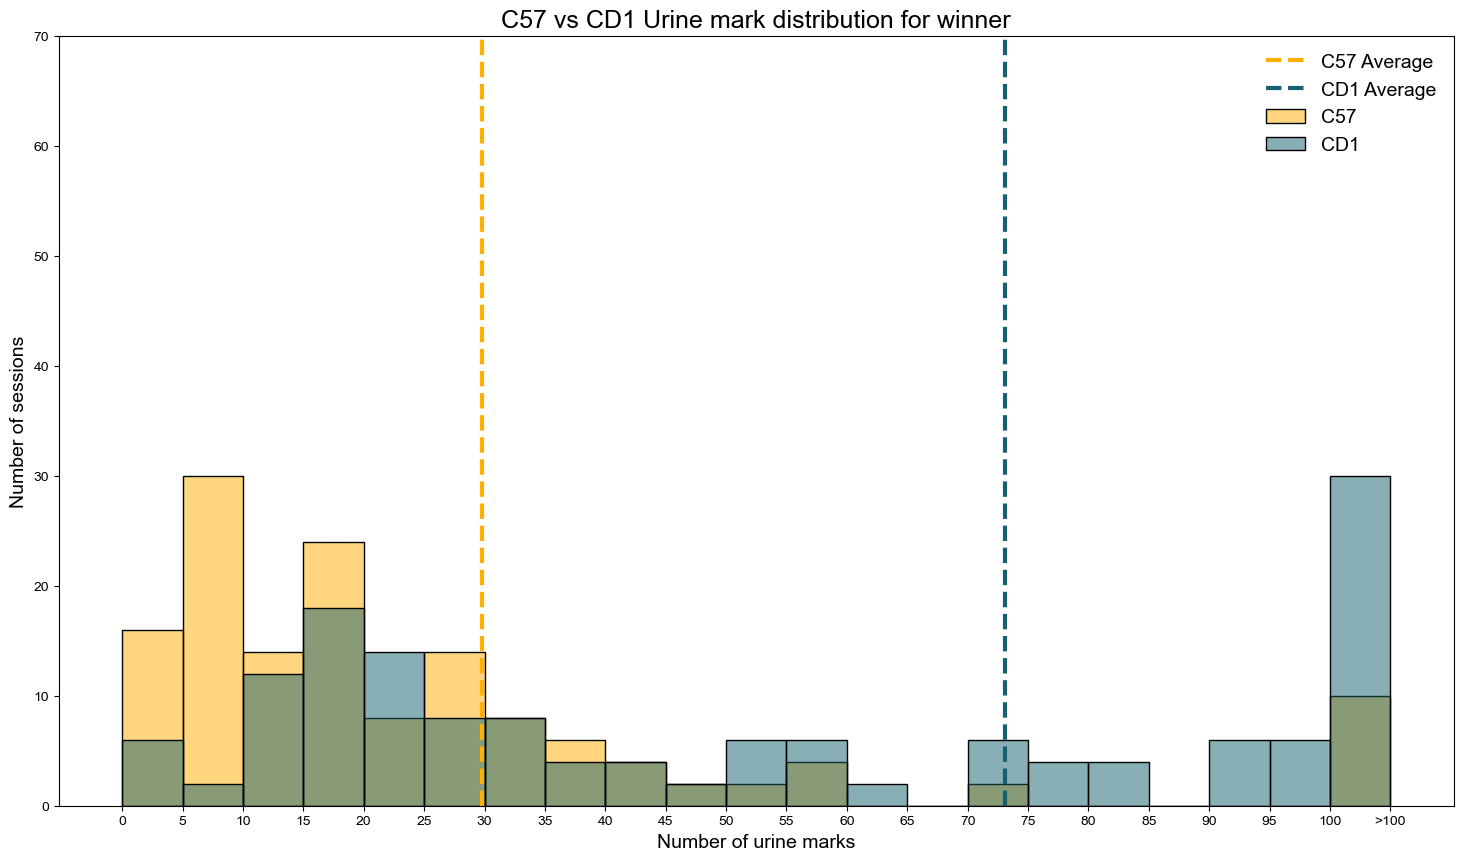

In [29]:
fig, ax = plt.subplots()

# Plotting the distribution
sns.histplot(c57_df["adjusted_winner_number_of_spots"].abs(), bins=uma_bins, alpha=0.5, label='C57', color="#ffaf00")
sns.histplot(cd1_df["adjusted_winner_number_of_spots"].abs(), bins=uma_bins, alpha=0.5, label='CD1', color="#15616f")

# Plotting the average
plt.axvline(c57_df["winner_number_of_spots"].mean(), color='#ffaf00', linestyle='--', linewidth=3, label="C57 Average")
plt.axvline(cd1_df["winner_number_of_spots"].mean(), color='#15616f', linestyle='--', linewidth=3, label="CD1 Average")

# Set the new x-ticks and labels
# plt.xticks(bin_centers, bin_labels, rotation='horizontal')
plt.xticks(uma_bins, uma_bins[:-1] + [">100"], rotation='horizontal')

# Setting the y-axis maximum
plt.ylim((0,y_max))

# Plot information
plt.title("C57 vs CD1 Urine mark distribution for winner", family="Arial", fontsize=18)
plt.xlabel("Number of urine marks", family="Arial", fontsize=14)
plt.ylabel("Number of sessions", family="Arial", fontsize=14)
plt.legend(loc='upper right', prop={'size': 14, 'family': "Arial"}, frameon=False)

# plt.tight_layout()

# Saving figure and displaying
plt.savefig("./proc/urine_marking_plots/winner_only_uma_distribution.svg")
plt.show()

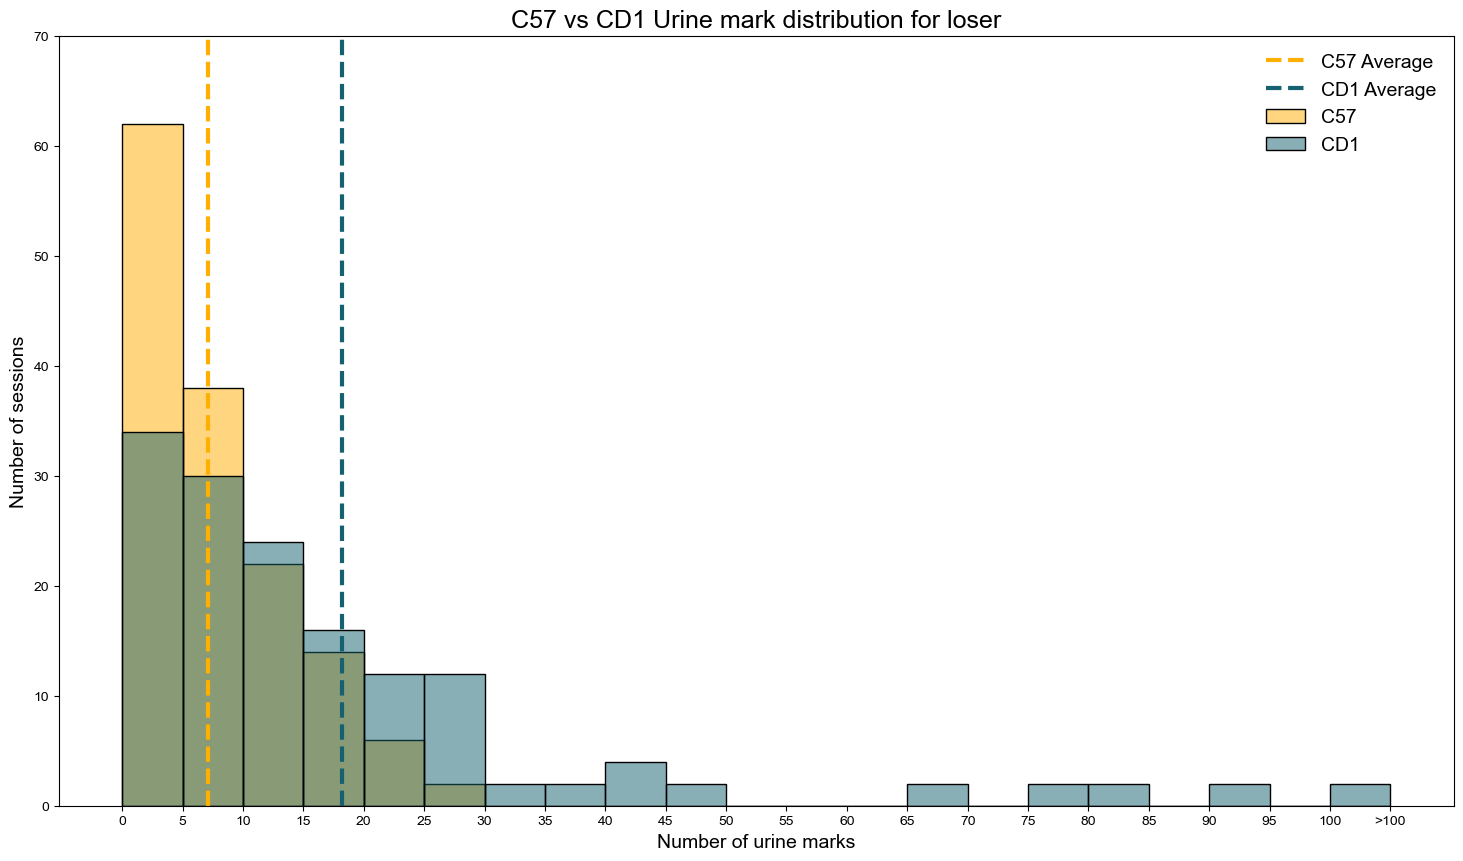

In [30]:
fig, ax = plt.subplots()

# Plotting the distribution
sns.histplot(c57_df["adjusted_loser_number_of_spots"].abs(), bins=uma_bins, alpha=0.5, label='C57', color="#ffaf00")
sns.histplot(cd1_df["adjusted_loser_number_of_spots"].abs(), bins=uma_bins, alpha=0.5, label='CD1', color="#15616f")

# Plotting the average
plt.axvline(c57_df["loser_number_of_spots"].mean(), color='#ffaf00', linestyle='--', linewidth=3, label="C57 Average")
plt.axvline(cd1_df["loser_number_of_spots"].mean(), color='#15616f', linestyle='--', linewidth=3, label="CD1 Average")

# Set the new x-ticks and labels
# plt.xticks(bin_centers, bin_labels, rotation='horizontal')
plt.xticks(uma_bins, uma_bins[:-1] + [">100"], rotation='horizontal')

# Setting the y-axis maximum
plt.ylim((0,y_max))

# Plot information
plt.title("C57 vs CD1 Urine mark distribution for loser", family="Arial", fontsize=18)
plt.xlabel("Number of urine marks", family="Arial", fontsize=14)
plt.ylabel("Number of sessions", family="Arial", fontsize=14)
plt.legend(loc='upper right', prop={'size': 14, 'family': "Arial"}, frameon=False)

# plt.tight_layout()

# Saving figure and displaying
plt.savefig("./proc/urine_marking_plots/loser_only_uma_distribution.svg")
plt.show()